# Evaluation Project - 8

Rainfall Prediction - Weather Forecasting

Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict
the conditions of the atmosphere for a given location and time. 
Weather forecasts are made by collecting quantitative data about the
current state of the atmosphere at a given place and using meteorology 
to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow.
The Dataset contains about 10 years of daily weather observations
of different locations in Australia. Here, predict two things:
    
    

# Problem Statement: 
    
a) Design a predictive model with the use of machine learning algorithms
   to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms
    to predict how much rainfall could be there.

Dataset Description:
    

Number of columns: 23
Date  - The date of observation
Location  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud 
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



In [7]:
#For Data loading and preprocessing
import pandas as pd

#For matrix operations
import numpy as np

#For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For splitting the data
from sklearn.model_selection import train_test_split

#For data preprocessing
from sklearn.preprocessing import StandardScaler

#For hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
#For appling LogisticRegression
from sklearn.linear_model import LogisticRegression



#For math operations
import math 

#To see the progress of the iterations
#from tqdm import tqdm

#Performance metrices
from sklearn.metrics import roc_auc_score,roc_curve,auc,log_loss,confusion_matrix

#For encoding the features
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

#For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
dt = pd.read_csv('D:\Data Trained - Excel links\weatherAUS.csv')

print("Total no.of points = {}".format(dt.shape[0]))
dt.head(10)

Total no.of points = 8425


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


# 1. EXPLORATORY DATA ANALYSIS

In [9]:
dt.drop_duplicates(inplace=True)

In [10]:
dt.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

We can see there are many Null values in the data , lets try to fill with proper values

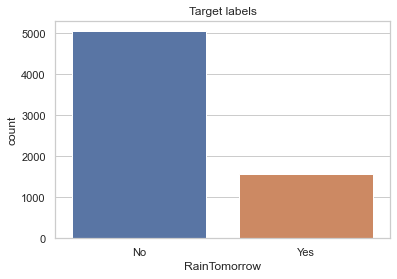

In [11]:
sns.set(style="whitegrid")
sns.countplot(dt.RainTomorrow)
plt.title("Target labels")
plt.show()

From above plot it is clear that data set is imbalanced

In [12]:
#Separating the data based on its class label.
dt_yes = dt[dt['RainTomorrow']=='Yes']
dt_no = dt[dt['RainTomorrow']=='No']

Now lets observe the most occuring values in every column for both the cases

In [13]:
#Observing the mode for all columns when RainTomorrow = Yes  
mode_values_for_yes = dt_yes.mode()
mode_values_for_yes

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-03-14,PerthAirport,13.2,19.0,0.0,2.6,0.0,N,37.0,N,...,91.0,67.0,1014.1,1011.1,8.0,8.0,14.8,17.0,No,Yes
1,2009-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2009-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2009-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2009-06-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2009-06-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2009-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Observing the mode for all columns when RainTomorrow = No  
mode_values_for_no = dt_no.mode()
mode_values_for_no


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2011-01-21,PerthAirport,12.0,20.0,0.0,4.0,11.0,E,35.0,SW,...,68.0,49.0,1020.0,1017.8,1.0,1.0,18.0,19.2,No,No
1,2011-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2011-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2011-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
dt_no['MaxTemp'].median()

24.1

In [16]:
#For Temparatures we cannot replace NaN values with 0, hence replacing NaN with its respective mode value
dt_yes['MinTemp'].fillna(value=dt_yes['MinTemp'].mode()[0],inplace=True )
dt_no['MinTemp'].fillna(value=dt_no['MinTemp'].mode()[0],inplace=True )

dt_yes['MaxTemp'].fillna(value=dt_yes['MaxTemp'].mode()[0],inplace=True )
dt_no['MaxTemp'].fillna(value=dt_no['MaxTemp'].mode()[0],inplace=True )


dt_yes['Temp9am'].fillna(value=dt_yes['Temp9am'].mode()[0],inplace=True )
dt_no['Temp9am'].fillna(value=dt_no['Temp9am'].mode()[0],inplace=True )

dt_yes['Temp3pm'].fillna(value=dt_yes['Temp3pm'].mode()[0],inplace=True )
dt_no['Temp3pm'].fillna(value=dt_no['Temp3pm'].mode()[0],inplace=True )


# For humidity also 
dt_yes['Humidity9am'].fillna(value=dt_yes['Humidity9am'].mode()[0],inplace=True )
dt_no['Humidity9am'].fillna(value=dt_no['Humidity9am'].mode()[0],inplace=True )



dt_yes['Humidity3pm'].fillna(value=dt_yes['Humidity3pm'].mode()[0],inplace=True )
dt_no['Humidity3pm'].fillna(value=dt_no['Humidity3pm'].mode()[0],inplace=True )

# For the rain fall feature we can replace NaN with 0.0 which says there is no rain fall
dt_yes['Rainfall'].fillna(value=0.0,inplace=True)
dt_no['Rainfall'].fillna(value=0.0,inplace=True)


dt_yes['Pressure9am'].fillna(value=dt_yes['Pressure9am'].median(),inplace=True )
dt_no['Pressure9am'].fillna(value=dt_no['Pressure9am'].median(),inplace=True )

dt_yes['Pressure3pm'].fillna(value=dt_yes['Pressure3pm'].median(),inplace=True )
dt_no['Pressure3pm'].fillna(value=dt_no['Pressure3pm'].median(),inplace=True )


dt_yes['WindSpeed9am'].fillna(value=dt_yes['WindSpeed9am'].median(),inplace=True )
dt_no['WindSpeed9am'].fillna(value=dt_no['WindSpeed9am'].median(),inplace=True )

dt_yes['WindSpeed3pm'].fillna(value=dt_yes['WindSpeed3pm'].median(),inplace=True )
dt_no['WindSpeed3pm'].fillna(value=dt_no['WindSpeed3pm'].median(),inplace=True )

#WindGustSpeed -- replacing with median

dt_yes['WindGustSpeed'].fillna(value=dt_yes['WindGustSpeed'].median(),inplace=True)
dt_no['WindGustSpeed'].fillna(value=dt_no['WindGustSpeed'].median(),inplace=True)

In [17]:
# For RainToday feature we cannot fill any value, so better to remove the NaN values 
dt_yes.dropna(inplace=True)
dt_no.dropna(inplace=True)

In [18]:
dt_filled= dt_yes.append(dt_no, ignore_index=True)

In [19]:
dt_filled.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

In [20]:
print("Percentage of removed points= {}%".format(100.00-(len(dt_filled)*100/len(dt))))

Percentage of removed points= 53.519668737060044%


In [21]:
# sorting the data based on data (Time based splitting)
dt_filled=dt_filled.sort_values(by='Date')

In [24]:
#Removing unwanted features, RISK_MM is same as target label hence removing with data and loaction  
dt_final = dt_filled.drop(['Date', 'Location'], axis=1)

In [25]:
dt_final.shape

(3143, 21)

 checking for any outliers

<AxesSubplot:>

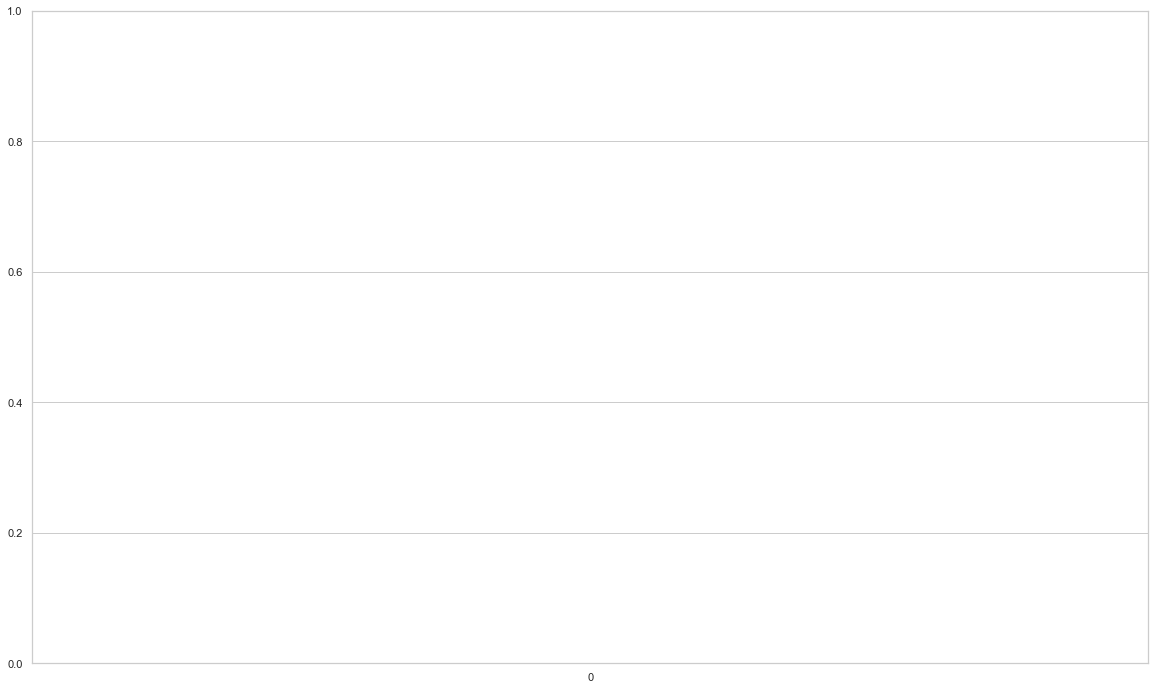

In [26]:
#Outliers we are checking only for numerical features
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))
sns.boxplot(dt=dt_final[['MinTemp','MaxTemp','Temp9am','Temp3pm']])

<AxesSubplot:>

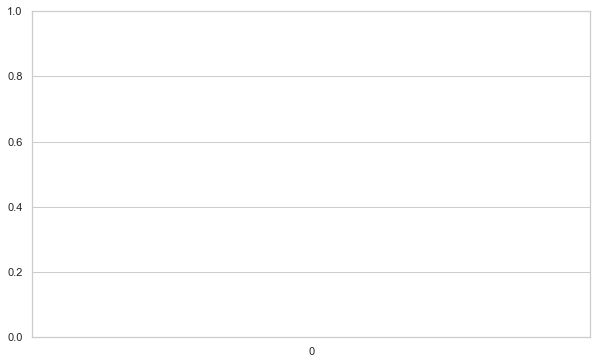

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(dt=dt_final[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']])

In [38]:
dt_final= dt_final[dt_final['Humidity3pm']!=0.0]
dt_final= dt_final[dt_final['Humidity9am']!=0.0]

<AxesSubplot:>

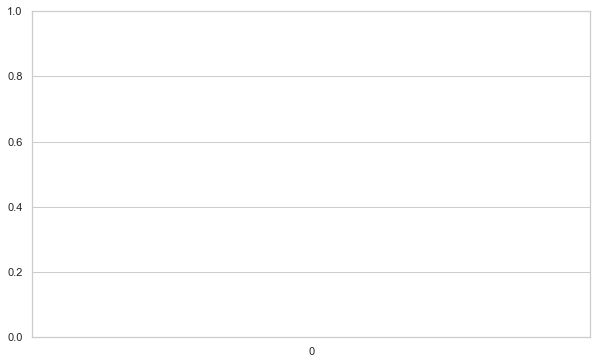

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(dt=dt_final[['Humidity9am','Humidity3pm']])

<AxesSubplot:>

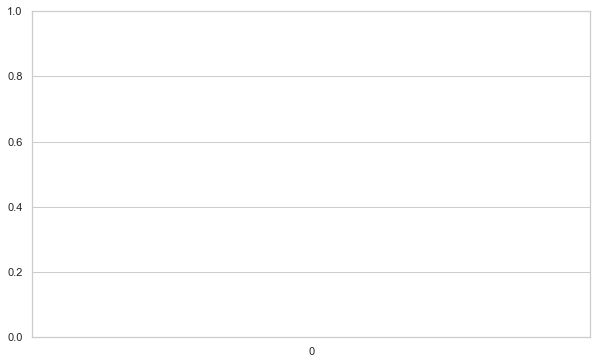

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(dt=dt_final[['Pressure9am','Pressure3pm']])

<AxesSubplot:>

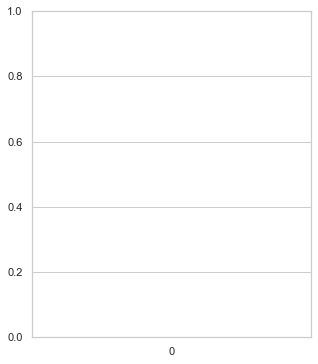

In [41]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))
sns.boxplot(dt=dt_final[['Rainfall']])

In [ ]:
@ I tried a lot to get the plotting of graph ,
but failed many times what's the reason for not geting the ouput

# Data pre-processing and Feature engineering

In [ ]:
From the EDA we observed that there are few categorical variables they are :
WindGustDir
RainToday
WindDir9am
WindDir3pm
and class label = RainTomorrow
so encoding all these features into values

In [43]:
WindGustDir_encode = LabelEncoder()
dt_final['WindGustDir']=WindGustDir_encode.fit_transform(dt_final['WindGustDir'])

WindDir9am_encode = LabelEncoder()
dt_final['WindDir9am']=WindDir9am_encode.fit_transform(dt_final['WindDir9am'])

WindDir3pm_encode = LabelEncoder()
dt_final['WindDir3pm']=WindDir3pm_encode.fit_transform(dt_final['WindDir3pm'])

RainToday_encode = LabelEncoder()
dt_final['RainToday']=RainToday_encode.fit_transform(dt_final['RainToday'])

RainTomorrow_encode = LabelEncoder()
dt_final['RainTomorrow']=RainTomorrow_encode.fit_transform(dt_final["RainTomorrow"])

In [44]:
Y= dt_final['RainTomorrow']
X = dt_final.drop(['RainTomorrow'],axis=1)

In [45]:
column_names=X.columns.tolist()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.80,shuffle=False)

Since the features are measured from different scales, appling featruring scaling

In [47]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
def plotErrors(k,train,cv):
       
    plt.plot(k, train, label='Train logloss')
    plt.plot(k, cv, label='CV logloss')
    plt.legend()
    plt.xlabel("log(C)= -log(λ)")
    plt.ylabel("Neg_Log Loss")
    plt.title("Error Plot for Train and Validation data")
    plt.grid()
    plt.show()

# Modeling the data using Logisitic Regression

Hyper-parameter tuning

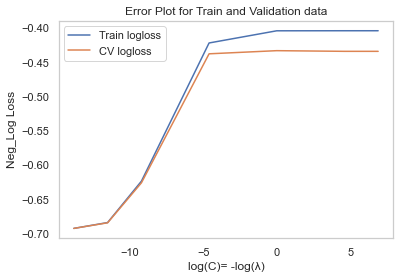

In [50]:
parameters={'C':[10**-6,10**-5,10**-4, 10**-2, 10**0, 10**2, 10**3] }
log_c = list(map(lambda x : float(math.log(x)),parameters['C']))

clf_log = LogisticRegression(penalty='l2',class_weight='balanced')

clf = GridSearchCV(clf_log, parameters, cv=5, scoring='neg_log_loss',return_train_score =True)
clf.fit(X_train, y_train)

train_loss= clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 

plotErrors(k=log_c,train=train_loss,cv=cv_loss)

In [51]:
clf = clf.best_estimator_
clf

LogisticRegression(C=1, class_weight='balanced')

In [52]:
#Trainig with the best value of C
clf.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced')

Model Evaluating

In [53]:
#Printing the log-loss for both trian and test data
train_loss = log_loss(y_train, clf.predict_proba(X_train)[:,1])
test_loss  =log_loss(y_test, clf.predict_proba(X_test)[:,1])


print("Log_loss on train data is :{}".format(train_loss))
print("Log_loss on test data is :{}".format(test_loss))

Log_loss on train data is :0.40637517849905347
Log_loss on test data is :0.3389237994625984


Since log-loss can have any value between [0, ∞] so we can only interpret the model
prefectly fitted or not but we cannot tell how best the model is, hence checking with AUC metric

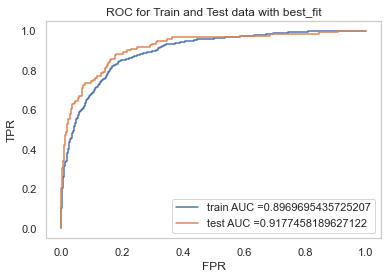

In [54]:
#Plotting AUC 
train_fpr, train_tpr, thresholds = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC for Train and Test data with best_fit")
plt.grid()
plt.show()

Making Confusion Matrix

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (2).

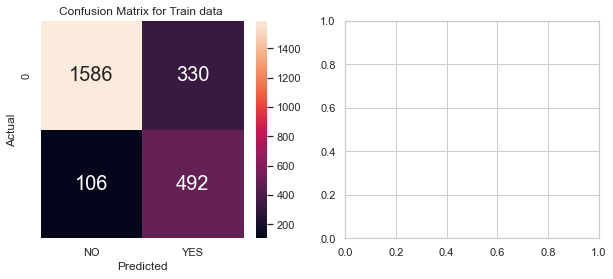

In [56]:
#ploting Confusion matrix
#Ref:https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/48018785
def plotcm (cm,ax,title):
    sns.heatmap(cm, ax=ax,annot=True,fmt='d',annot_kws={'size':20},yticklabels=3);
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Actual'); 
    ax.set_title('Confusion Matrix for {} '.format(title)); 
    ax.xaxis.set_ticklabels(['NO', 'YES']); 
    ax.yaxis.set_ticklabels(['NO', 'YES']);


fig, subplt = plt.subplots(1, 2,figsize=(10, 4)) 
cm=confusion_matrix(y_train, clf.predict(X_train))
ax= subplt[0]
plotcm(cm,ax,'Train data')

cm=confusion_matrix(y_test, clf.predict(X_test))
ax= subplt[1]
plotcm(cm,ax,'Test data')

Feature interpretation

In [57]:
clf.coef_[0]

array([-0.47077287, -0.22907514,  0.30554917,  0.19691796, -0.55519826,
        0.03912579,  0.85139925,  0.11288056, -0.01849427, -0.07421083,
       -0.08092129,  0.09014818,  1.28206365,  0.60259278, -0.81431726,
       -0.0479622 ,  0.50644968,  0.227777  ,  0.46371072,  0.22788956])

In [58]:
feature_weights=sorted(zip(clf.coef_[0],column_names),reverse = True)

In [59]:
feature_weights

[(1.2820636475968106, 'Humidity3pm'),
 (0.8513992515610619, 'WindGustSpeed'),
 (0.6025927842328253, 'Pressure9am'),
 (0.5064496805785778, 'Cloud3pm'),
 (0.4637107150777284, 'Temp3pm'),
 (0.3055491663150519, 'Rainfall'),
 (0.22788956332689758, 'RainToday'),
 (0.22777699812923707, 'Temp9am'),
 (0.1969179573116727, 'Evaporation'),
 (0.11288056446690667, 'WindDir9am'),
 (0.0901481804729997, 'Humidity9am'),
 (0.03912578925421795, 'WindGustDir'),
 (-0.018494267413641883, 'WindDir3pm'),
 (-0.04796219641901343, 'Cloud9am'),
 (-0.07421083323301708, 'WindSpeed9am'),
 (-0.08092129372968898, 'WindSpeed3pm'),
 (-0.22907513602505652, 'MaxTemp'),
 (-0.47077286880133984, 'MinTemp'),
 (-0.5551982635266587, 'Sunshine'),
 (-0.8143172588601142, 'Pressure3pm')]

In [60]:
def will_rain_fall_for_this_conditions(xq):
    
    xq["WindGustDir"]=WindGustDir_encode.transform([xq["WindGustDir"]])
    xq["WindDir9am"]=WindDir9am_encode.transform([xq["WindDir9am"]])
    xq["WindDir3pm"]=WindDir3pm_encode.transform([xq["WindDir3pm"]])
    xq["RainToday"]=RainToday_encode.transform([xq["RainToday"]])
    xq=np.array(list((xq.values())))
    final_xq = scaler.transform(xq.reshape(1, -1))
    chance=clf.predict_proba(final_xq)[:,1]
    if chance>=0.5:
        print("Yes, there is a {} % chance of rain can fall on tommorow ".format(chance*100))
    else:
        print("No, there is only {}% chance of rainfall hence we cannot expect rain on tommorow ".format(chance*100))
    print("Because today's Humidity at 3pm ={}%,Atmosphereic Pressure at 9am={}millibars,and Wind Gust Speed ={}km/hr, which are very good sign for rainfall"
          .format(Humidity3pm,Pressure9am,WindGustSpeed)) 

In [61]:
#Giving one query point here

MinTemp   = 26.2
MaxTemp   = 31.7
Rainfall   = 2.8
Evaporation   = 5.4
Sunshine   = 3.5
WindGustDir   = "NNW"
WindGustSpeed   = 57
WindDir9am   = "NNW"
WindDir3pm   = "NNW"
WindSpeed9am   = 20
WindSpeed3pm   = 13
Humidity9am   = 81
Humidity3pm   = 95
Pressure9am   = 1007.2
Pressure3pm   = 1006.1
Cloud9am   = 7
Cloud3pm   = 8
Temp9am   = 28.8
Temp3pm   = 25.4
RainToday   ="Yes"

In [62]:
point = [MinTemp,MaxTemp,Rainfall,
         Evaporation,Sunshine,WindGustDir,
         WindGustSpeed,WindDir9am,WindDir3pm,
         WindSpeed9am,WindSpeed3pm,Humidity9am,
         Humidity3pm,Pressure9am,Pressure3pm,
         Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday]

xq=dict()
for i,name in enumerate(column_names):
    xq[name]=point[i]

Results

In [63]:
will_rain_fall_for_this_conditions(xq)

Yes, there is a [99.21982113] % chance of rain can fall on tommorow 
Because today's Humidity at 3pm =95%,Atmosphereic Pressure at 9am=1007.2millibars,and Wind Gust Speed =57km/hr, which are very good sign for rainfall


# CONCLUSION

In [ ]:
@ We have doen EDA process, Feature Engineering, and Modeling process and found
out the the chances of rainfall

Yes, there is a [99.21982113] % chance of rain can fall on tommorow 
Because today's Humidity at 3pm =95%,Atmosphereic Pressure at 9am=1007.2millibars,
and Wind Gust Speed =57km/hr, which are very good sign for rainfall